##**PRE-PROCESSING:**

In [23]:
import sys
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from time import perf_counter
from pathlib import Path
from IPython.display import Image, display, Markdown

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf

import seaborn as sns

In [24]:
def printmd(string):
    display(Markdown(string))

In [25]:
imageDir = Path('/content/drive/MyDrive/DR Datasets')

filepaths = list(imageDir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [26]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label').astype(str)

image_df = pd.concat([filepaths, labels], axis=1)
image_df = image_df.sample(frac=1).reset_index(drop = True)

image_df

,Filepath,Label
0,/content/drive/MyDrive/DR Datasets/No_DR/784d6...,No_DR
1,/content/drive/MyDrive/DR Datasets/No_DR/d911d...,No_DR
2,/content/drive/MyDrive/DR Datasets/Mild/0a3202...,Mild
3,/content/drive/MyDrive/DR Datasets/No_DR/d02b7...,No_DR
4,/content/drive/MyDrive/DR Datasets/No_DR/76359...,No_DR
...,...,...
3671,/content/drive/MyDrive/DR Datasets/No_DR/d1afd...,No_DR
3672,/content/drive/MyDrive/DR Datasets/No_DR/ca05f...,No_DR
3673,/content/drive/MyDrive/DR Datasets/Proliferate...,Proliferate_DR
3674,/content/drive/MyDrive/DR Datasets/No_DR/0abf0...,No_DR


## **Visualization**

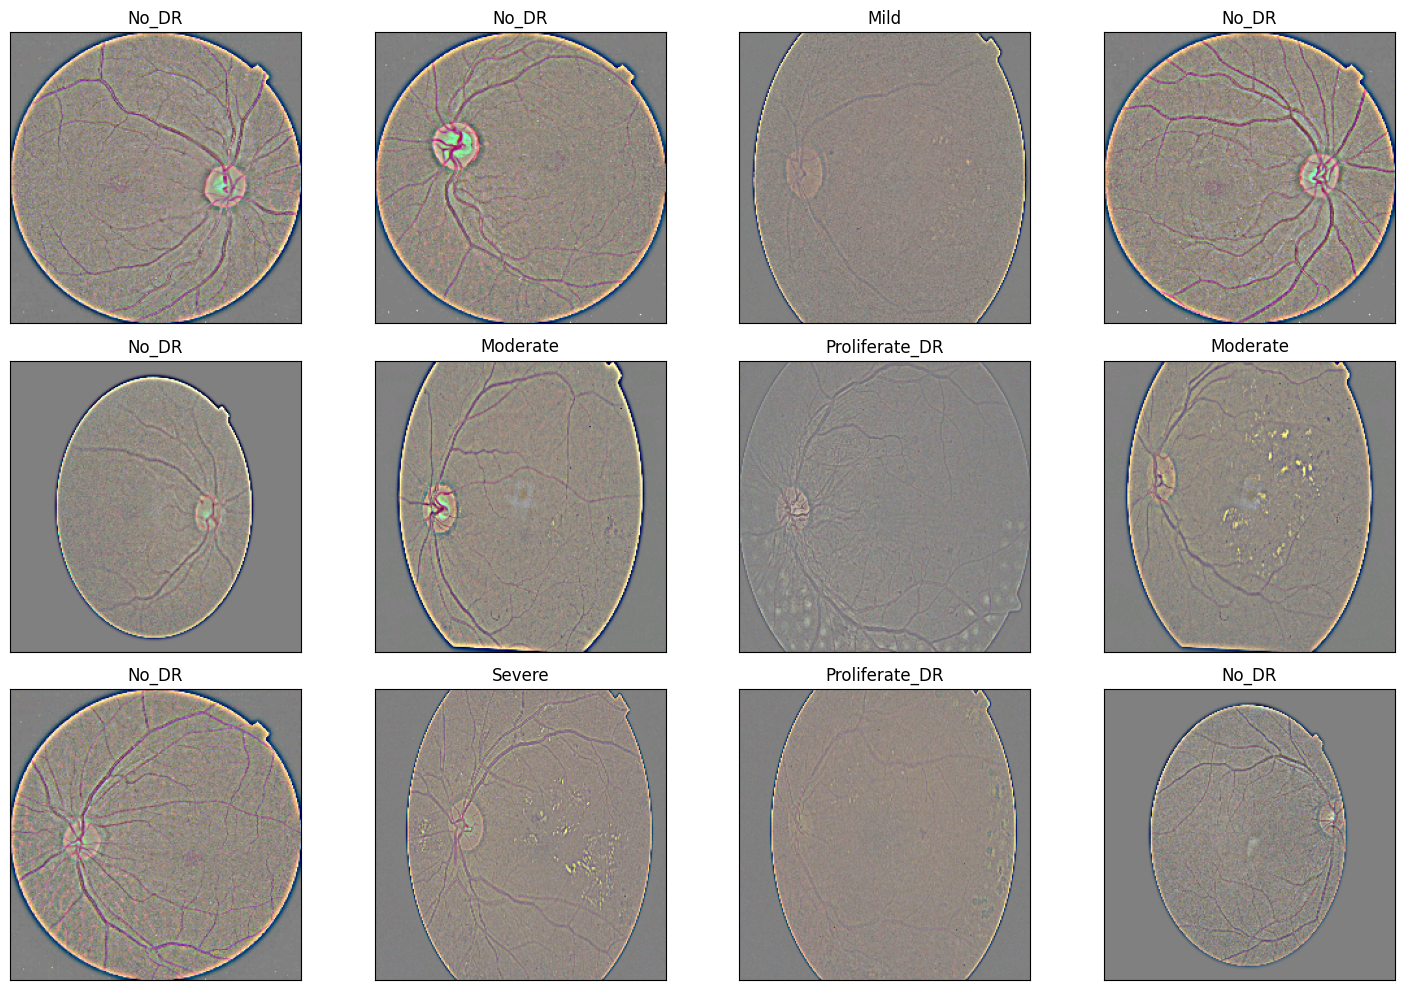

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])

plt.tight_layout()
plt.show()

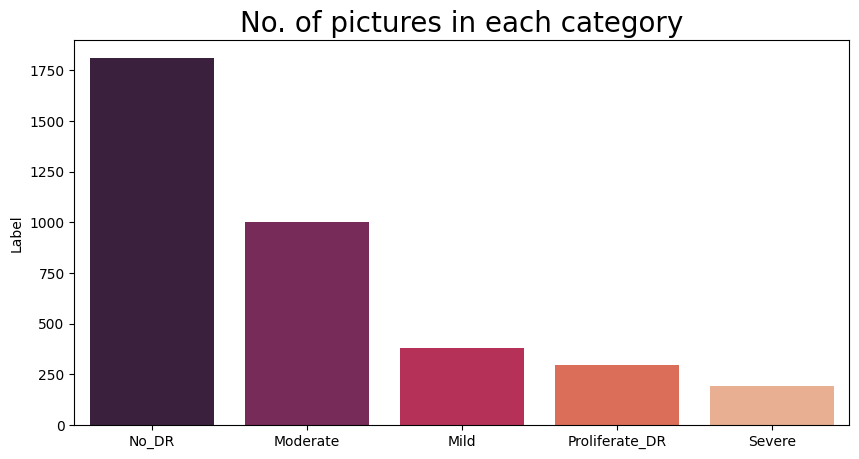

In [28]:
vc = image_df['Label'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=vc.index, y=vc, palette="rocket")
plt.title("No. of pictures in each category", fontsize=20)
plt.show()

## **NOISE REMOVAL**

In [ ]:
# Define a function to remove noise from an image
def remove_noise(image):
    # Applying Gaussian Blur to reduce noise
    denoised = cv2.GaussianBlur(image, (5, 5), 0)
    return denoised

# Path to the directory containing images
imageDir = Path('/content/drive/MyDrive/DR Dataset')

# Retrieve all .png file paths in the directory and its subdirectories
filepaths = list(imageDir.glob('**/*.png'))

# Process images and save denoised versions in the same directory
for filepath in filepaths:
    img = cv2.imread(str(filepath))

    # Apply noise removal
    denoised_img = remove_noise(img)

    # Save the denoised image back to the same directory
    cv2.imwrite(str(filepath), denoised_img)

print("Noise removal process complete.")

Noise removal process complete.


## **CONVERSION INTO GREY SCALE IMAGE**

In [ ]:
# Function to convert the images to grayscale
def convert_to_grayscale(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

# Path to the directory containing denoised images
denoised_imageDir = Path('/content/drive/MyDrive/DR Dataset')

# Retrieve all denoised image file paths in the directory and its subdirectories
denoised_filepaths = list(denoised_imageDir.glob('**/*.png'))

# Process denoised images and convert to grayscale
for filepath in denoised_filepaths:
    img = cv2.imread(str(filepath))

    # Convert the image to grayscale
    gray_image = convert_to_grayscale(img)

    # Save the grayscale image back to the same directory
    cv2.imwrite(str(filepath), gray_image)

print("Conversion to grayscale complete.")


Conversion to grayscale complete.


## **Digital  image representation**

Digital representation of the image /content/drive/MyDrive/DR Dataset/Mild/0024cdab0c1e.png:
[[[128 128 128]
  [128 128 128]
  [128 128 128]
  [128 128 128]
  [129 129 129]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  [128 128 128]
  [129 129 129]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  [128 128 128]
  [128 128 128]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  [128 128 128]
  [128 128 128]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  [128 128 128]
  [128 128 128]]]


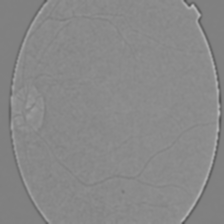

Digital representation of the image /content/drive/MyDrive/DR Dataset/No_DR/002c21358ce6.png:
[[[128 128 128]
  [128 128 128]
  [128 128 128]
  [127 127 127]
  [126 126 126]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  [127 127 127]
  [126 126 126]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  [127 127 127]
  [127 127 127]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  [128 128 128]
  [127 127 127]]

 [[128 128 128]
  [128 128 128]
  [129 129 129]
  [127 127 127]
  [127 127 127]]]


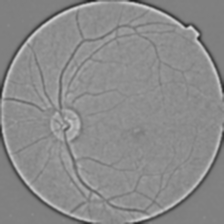

Digital representation of the image /content/drive/MyDrive/DR Dataset/Proliferate_DR/001639a390f0.png:
[[[129 129 129]
  [128 128 128]
  [128 128 128]
  [127 127 127]
  [127 127 127]]

 [[129 129 129]
  [128 128 128]
  [128 128 128]
  [127 127 127]
  [127 127 127]]

 [[130 130 130]
  [129 129 129]
  [128 128 128]
  [127 127 127]
  [127 127 127]]

 [[129 129 129]
  [129 129 129]
  [128 128 128]
  [128 128 128]
  [127 127 127]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  [127 127 127]
  [127 127 127]]]


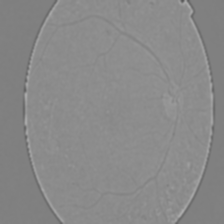

In [ ]:
from google.colab.patches import cv2_imshow

# Paths to the specific images you want to display
image_paths = [
    '/content/drive/MyDrive/DR Dataset/Mild/0024cdab0c1e.png',
    '/content/drive/MyDrive/DR Dataset/No_DR/002c21358ce6.png',
    '/content/drive/MyDrive/DR Dataset/Proliferate_DR/001639a390f0.png'
]

# Display the selected images
for path in image_paths:
    img = cv2.imread(path)

    if img is not None:
        print(f"Digital representation of the image {path}:")
        print(f"{img[:5, :5]}")  # Print the first 5x5 pixels

        # Display the image
        cv2_imshow(img)
    else:
        print(f"Failed to read image at {path}")


# **Resolution Adjust**

In [ ]:
# Function to adjust the resolution of images in a directory
def adjust_resolution_for_images(image_paths, new_width, new_height):
    for path in image_paths:
        # Read the image
        image = cv2.imread(str(path))

        if image is not None:
            # Resize the image to the new width and height
            resized_image = cv2.resize(image, (new_width, new_height))

            # Save the adjusted resolution image in the same directory with a different name
            filename = os.path.basename(path)
            adjusted_filename = f"adjusted_{filename}"
            adjusted_path = path.with_name(adjusted_filename)
            cv2.imwrite(str(adjusted_path), resized_image)

            print(f"Adjusted resolution image saved as {adjusted_filename}")
        else:
            print(f"Failed to read the image at {path}")

# Path to the directory containing images
imageDir = Path('/content/drive/MyDrive/DR Dataset')

# Retrieve all .png file paths in the directory and its subdirectories
filepaths = list(imageDir.glob('**/*.png'))

# Adjust resolution for the images in the directory
new_width = 640  # Replace with the desired width
new_height = 480  # Replace with the desired height
adjust_resolution_for_images(filepaths, new_width, new_height)


Adjusted resolution image saved as adjusted_55eac26bd383.png
Adjusted resolution image saved as adjusted_5712e2aa73a2.png
Adjusted resolution image saved as adjusted_5777ef74c9ec.png
Adjusted resolution image saved as adjusted_8bc6716c2238.png
Adjusted resolution image saved as adjusted_8bbd7835e9aa.png
Adjusted resolution image saved as adjusted_8a25a080f28f.png
Adjusted resolution image saved as adjusted_89d9c071a56f.png
Adjusted resolution image saved as adjusted_ca25745942b0.png
Adjusted resolution image saved as adjusted_92d9e9f08709.png
Adjusted resolution image saved as adjusted_8f2996b8d855.png
Adjusted resolution image saved as adjusted_8ef2eb8c51c4.png
Adjusted resolution image saved as adjusted_93be637084a2.png
Adjusted resolution image saved as adjusted_8fc09fecd22f.png
Adjusted resolution image saved as adjusted_ca6842bfcbc9.png
Adjusted resolution image saved as adjusted_ca30a97e9d13.png
Adjusted resolution image saved as adjusted_90c982cc2d96.png
Adjusted resolution imag

# **Image Histograms**

Histogram of the image /content/drive/MyDrive/DR Dataset/Mild/0024cdab0c1e.png:


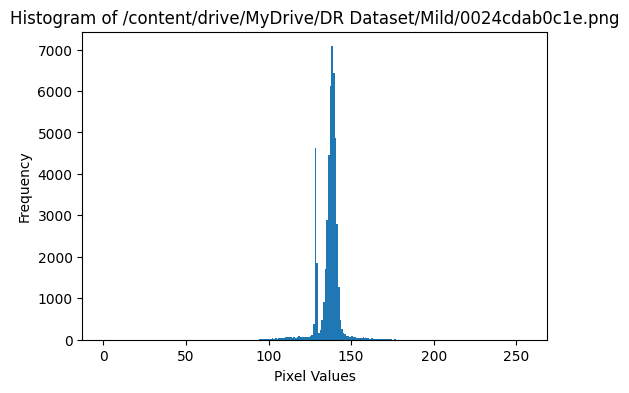

Histogram of the image /content/drive/MyDrive/DR Dataset/No_DR/002c21358ce6.png:


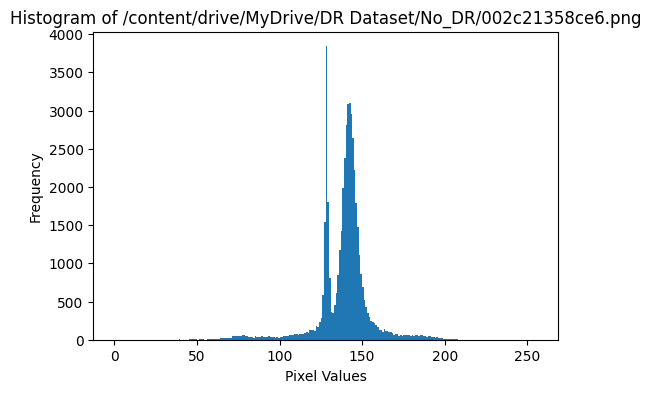

Histogram of the image /content/drive/MyDrive/DR Dataset/Proliferate_DR/001639a390f0.png:


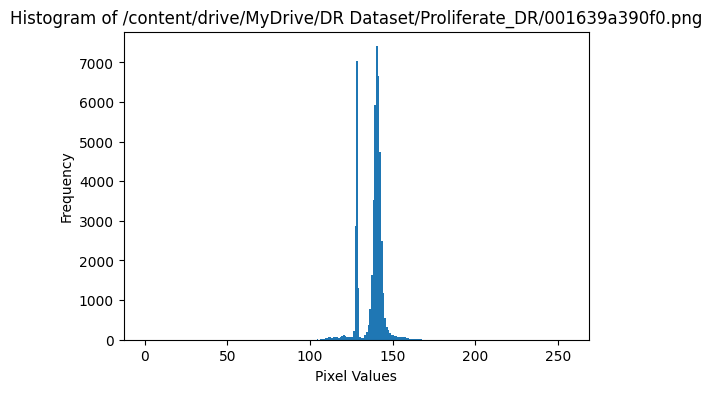

In [ ]:
# Paths to the specific images you want to display
image_paths = [
    '/content/drive/MyDrive/DR Dataset/Mild/0024cdab0c1e.png',
    '/content/drive/MyDrive/DR Dataset/No_DR/002c21358ce6.png',
    '/content/drive/MyDrive/DR Dataset/Proliferate_DR/001639a390f0.png'
]

# Display the histograms of the selected images
for path in image_paths:
    img = cv2.imread(path)

    if img is not None:
        print(f"Histogram of the image {path}:")

        # Convert the image to grayscale for histogram
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Calculate and display the histogram
        plt.figure(figsize=(6, 4))
        plt.hist(gray_img.ravel(), 256, [0, 256])
        plt.title(f'Histogram of {path}')
        plt.xlabel('Pixel Values')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"Failed to read image at {path}")


# **Image Enhancement**

In [ ]:
# Function to enhance images in a directory
def enhance_images(image_paths):
    for path in image_paths:
        img = cv2.imread(str(path))

        if img is not None:
            # Increase contrast and brightness
            alpha = 1.5  # Contrast control (1.0-3.0)
            beta = 30  # Brightness control (0-100)
            enhanced_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

            # Save the enhanced image with a new filename
            new_filename = f"enhanced_{path.name}"
            cv2.imwrite(str(path.with_name(new_filename)), enhanced_image)
            print(f"Enhanced image saved as {new_filename}")
        else:
            print(f"Failed to read image at {path}")

# Directory path containing the images
imageDir = Path('/content/drive/MyDrive/DR Dataset')
filepaths = list(imageDir.glob('**/*.png'))

# Apply image enhancement to the images in the directory
enhance_images(filepaths)


Streaming output truncated to the last 5000 lines.
Enhanced image saved as enhanced_adjusted_f80118bbda18.png
Enhanced image saved as enhanced_adjusted_f69400b316a7.png
Enhanced image saved as enhanced_adjusted_f7edc074f06b.png
Enhanced image saved as enhanced_adjusted_f61bf44c677c.png
Enhanced image saved as enhanced_adjusted_e4151feb8443.png
Enhanced image saved as enhanced_adjusted_e3e490babc0c.png
Enhanced image saved as enhanced_adjusted_f3a268d2726d.png
Enhanced image saved as enhanced_adjusted_ee059945b08a.png
Enhanced image saved as enhanced_adjusted_ce887b196c23.png
Enhanced image saved as enhanced_adjusted_03ff7d159f10.png
Enhanced image saved as enhanced_adjusted_03fd50da928d.png
Enhanced image saved as enhanced_adjusted_0415fc68b176.png
Enhanced image saved as enhanced_adjusted_54dc6e8107cd.png
Enhanced image saved as enhanced_adjusted_55034b1dbff2.png
Enhanced image saved as enhanced_adjusted_55fd453001cc.png
Enhanced image saved as enhanced_adjusted_55092c0071eb.png
Enhan

# **Resize images 224*224**

In [ ]:
# Function to resize images in a directory to 224x224
def resize_images(image_paths):
    for path in image_paths:
        img = cv2.imread(str(path))

        if img is not None:
            # Resize the image to 224x224
            resized_image = cv2.resize(img, (224, 224))

            # Save the resized image with a new filename
            new_filename = f"resized_{path.name}"
            cv2.imwrite(str(path.with_name(new_filename)), resized_image)
            print(f"Resized image saved as {new_filename}")
        else:
            print(f"Failed to read image at {path}")

# Directory path containing the images
imageDir = Path('/content/drive/MyDrive/DR Dataset')
filepaths = list(imageDir.glob('**/*.png'))

# Resize images in the directory to 224x224
resize_images(filepaths)


Streaming output truncated to the last 5000 lines.
Resized image saved as resized_enhanced_3a643599f852.png
Resized image saved as resized_enhanced_3a4cfea0a766.png
Resized image saved as resized_enhanced_3c42512c81e0.png
Resized image saved as resized_enhanced_44878f34e31f.png
Resized image saved as resized_enhanced_41960d5f58c2.png
Resized image saved as resized_enhanced_31360e44ac64.png
Resized image saved as resized_enhanced_3132556f5352.png
Resized image saved as resized_enhanced_3178559fbf57.png
Resized image saved as resized_enhanced_30db694bee42.png
Resized image saved as resized_enhanced_315c1a0d87fd.png
Resized image saved as resized_enhanced_1f31701dd61b.png
Resized image saved as resized_enhanced_1f3f32efaf20.png
Resized image saved as resized_enhanced_33b978734eab.png
Resized image saved as resized_enhanced_33596a635b53.png
Resized image saved as resized_enhanced_33b91def2035.png
Resized image saved as resized_enhanced_3325b1fe55d2.png
Resized image saved as resized_enhanc

##**Load the Images with a generator**

In [29]:
def createGen():
    trainGen = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    testGen = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    trainImages = trainGen.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='training',
        rotation_range=30,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    valImages = trainGen.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
        rotation_range=30,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    testImages = testGen.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )

    return trainGen, testGen, trainImages, valImages, testImages

In [30]:
def getModel(model):
    kwargs = {
        'input_shape':(224, 224, 3),
        'include_top':False,
        'weights':'imagenet',
        'pooling':'avg'
    }

    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False

    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [31]:
train_df, test_df = train_test_split(image_df, train_size=0.9, shuffle=True, random_state=1)

In [32]:
models = {
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0}
    }

In [43]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [51]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    trainImages,
    validation_data=valImages,
    batch_size = 32,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
94/94 [==============================] - 144s 1s/step - loss: 0.7814 - accuracy: 0.7183 - val_loss: 0.6289 - val_accuracy: 0.7545
Epoch 2/10
94/94 [==============================] - 140s 1s/step - loss: 0.6247 - accuracy: 0.7676 - val_loss: 0.6073 - val_accuracy: 0.7788
Epoch 3/10
94/94 [==============================] - 142s 2s/step - loss: 0.5903 - accuracy: 0.7811 - val_loss: 0.5706 - val_accuracy: 0.7818
Epoch 4/10
94/94 [==============================] - 132s 1s/step - loss: 0.5496 - accuracy: 0.7955 - val_loss: 0.5791 - val_accuracy: 0.7939
Epoch 5/10
94/94 [==============================] - 139s 1s/step - loss: 0.5338 - accuracy: 0.7958 - val_loss: 0.6117 - val_accuracy: 0.7727


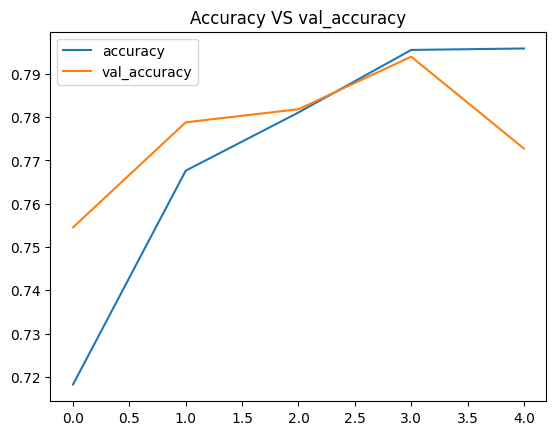

In [52]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy VS val_accuracy")
plt.show()

In [53]:
results = model.evaluate(testImages, verbose=0)

printmd('> ## Test Loss |> {:.5f}'.format(results[0]))
printmd('> ## Accuracy |> {:.2f}%'.format(results[1] *100))

> ## Test Loss |> 0.68180

> ## Accuracy |> 75.00%

In [54]:
pred = model.predict(testImages)
pred = np.argmax(pred,axis=1)

labels = (trainImages.class_indices)
labels = dict((v, k) for k, v in labels.items())

pred = [labels[k] for k in pred]

print(f'The first 10 predictions:\n{pred[:10]}')

12/12 [==============================] - 16s 1s/step
The first 10 predictions:
['Mild', 'Moderate', 'Moderate', 'Proliferate_DR', 'Moderate', 'Moderate', 'Moderate', 'No_DR', 'No_DR', 'No_DR']


In [55]:
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                precision    recall  f1-score   support

          Mild       0.06      0.06      0.06        33
      Moderate       0.27      0.33      0.29       101
         No_DR       0.49      0.53      0.51       177
Proliferate_DR       0.10      0.06      0.07        36
        Severe       0.00      0.00      0.00        21

      accuracy                           0.35       368
     macro avg       0.18      0.19      0.19       368
  weighted avg       0.32      0.35      0.34       368



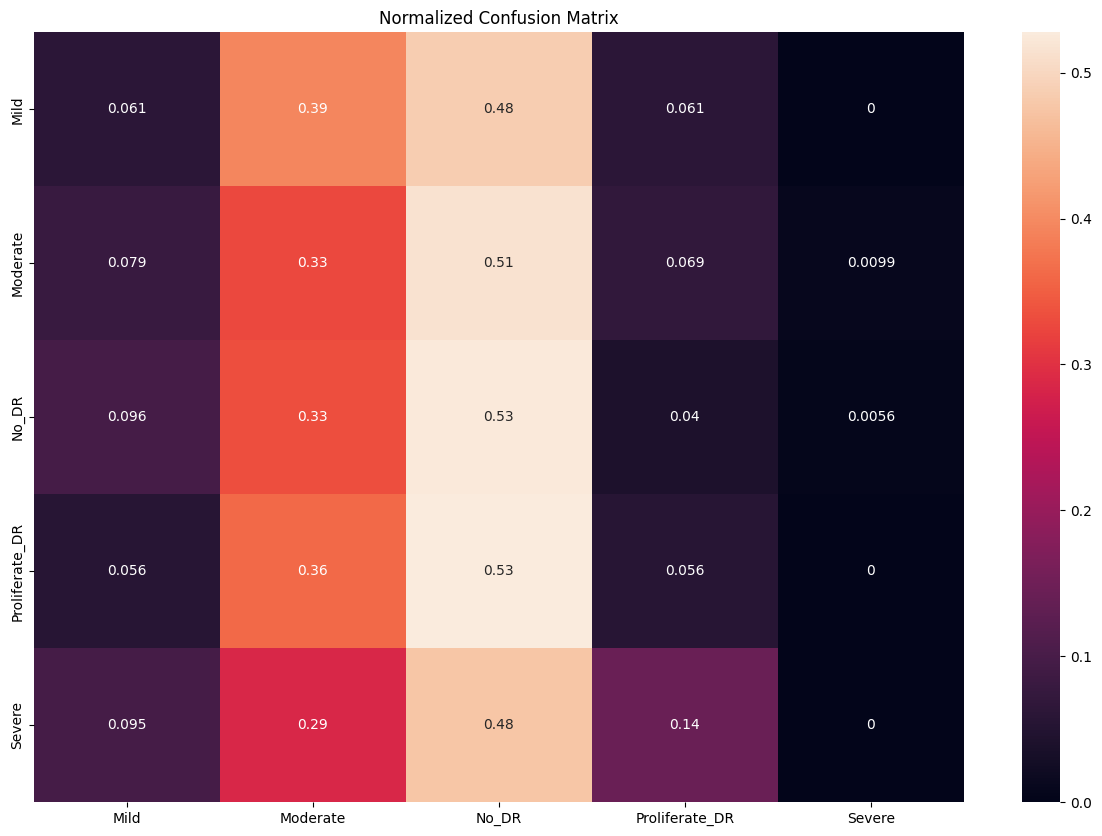

In [56]:
cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (15, 10))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.show()